| | |
|:----------|:----------|
| Name      | Bayesian Modeling |
| Notebook  | Metropolis Sampler |
| Author    | Joshuah Touyz, PhD |
| Version   | 0.1 |
|Last update| 02/29/20 |

In [24]:
import numpy as np
import pandas as pd
from plotnine import *

In [34]:
# Metropolis Sampler for Poisson Gamma
#### Poisson Gamma
x = np.random.poisson(lam=10, size=1) # True value

# Utility functions
rnorm = lambda : np.random.normal(size = 1)
runif = lambda: np.random.uniform(size = 1)

# Constants
n = 15 ; n_iter = 10000
alpha = 1; beta = 1
lambda_p = np.ones(n_iter)
alpha_prime = (sum(x) + alpha)
beta_prime =  (beta+n)

# Initial value
lambda_p[1] = np.mean(x)-5

for i in range(1,n_iter):
    # Constants
    lambda_proposed = lambda_p[i-1] + rnorm()
    # Boundary correction
    while(lambda_proposed<0):
        lambda_proposed =lambda_p[i-1] + rnorm()

    # Accept/reject criteria
    a = alpha_prime * (np.log(lambda_proposed) - np.log(lambda_p[i-1])) - \
    beta_prime * (lambda_proposed - lambda_p[i-1])

    log_u = np.log(runif())
    if (min(a,0)>log_u):
        # Accept sample
        lambda_p[i] = lambda_proposed
    else:
        # Reject sample
        lambda_p[i] = lambda_p[i-1]

lambda_p = pd.DataFrame(lambda_p).rename({0:'values'},axis=1)

/Users/joshuahtouyz/Desktop/projects/project_1/p1_venv/lib/python3.7/site-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 76'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)


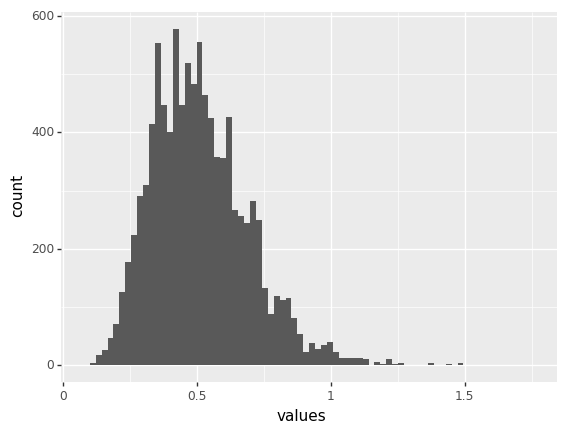

<ggplot: (-9223372036525639501)>

In [36]:
ggplot(aes(x = 'values'), data = lambda_p) + geom_histogram()

### Exercise 2
Program a Metropolis sampler for the normal-normal distribution

In [59]:
#  Constants
x = np.array([1,6,8,-2,6]); mu_0=6; sigma2 = 3; tau2 = 20; n = 5

# Utility functions
log_dnorm = lambda x,mu_in,v_in: -0.5*2*np.pi*np.log(v_in) -(x-mu_in)**2/(2*v_in)

# Acceptance condition
log_a = lambda mu_star,mu_s : (
  np.sum(log_dnorm(x,mu_star,sigma2)) - 
  np.sum(log_dnorm(x,mu_s,sigma2)) +
  log_dnorm(mu_0,mu_star,tau2) - 
  log_dnorm(mu_0,mu_s,tau2)  
)

# Pre-populate vector 
n_samples = 10000
mu_samples = np.ones(n_samples)

# Initialize
x[1] = 3    

# Run Metropolis
for i in range(1,n_samples):
    current_mu = mu_samples[i-1]
    proposed_mu = current_mu + rnorm() 

    r = log_a(proposed_mu,current_mu)
    log_u = np.log(runif())

    if(log_u<min(0,r)):
        # Accept sample
        mu_samples[i] = proposed_mu      
    else:
        # Reject sample
        mu_samples[i] = current_mu       

# Posterior distribution
sigma2_n = 1/(1/tau2 + n/sigma2)
mu_n = np.mean(x) * n/sigma2  * sigma2_n + mu * 1/tau2 * sigma2_n
#theta_post = dnorm(seq(0,10,by = 0.1), mean = mu_n, sd = np.sqrt(sigma2_n))
#df_post = tibble(x = seq(0,10,by = 0.1), theta_post = theta_post)

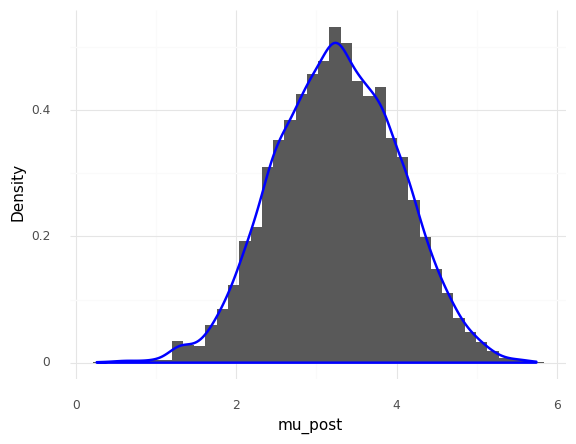

<ggplot: (-9223372036523320909)>

In [69]:
# Plot graph
ggplot(aes(x = 'values', y='stat(density)'), 
       data = pd.DataFrame(mu_samples).rename({0:'values'},axis=1))\
+ geom_histogram(bins = 40)\
+ geom_density(color = 'blue', size = 1,alpha= 0.4)\
+theme_minimal() + ylab('Density') + xlab('mu_post')